# Training (Default DDPM)

In [1]:
import src as diffusion_model
import torch
from torch.optim import Adam
import torchvision.transforms as transforms
import numpy as np
from src import data_loader, sample_generated_image, show_tensor_image
import matplotlib.pyplot as plt
from config import CONFIG

In [2]:
# Donwnload CIFAR10 data
train_loader, test_loader = data_loader()

Files already downloaded and verified
Files already downloaded and verified


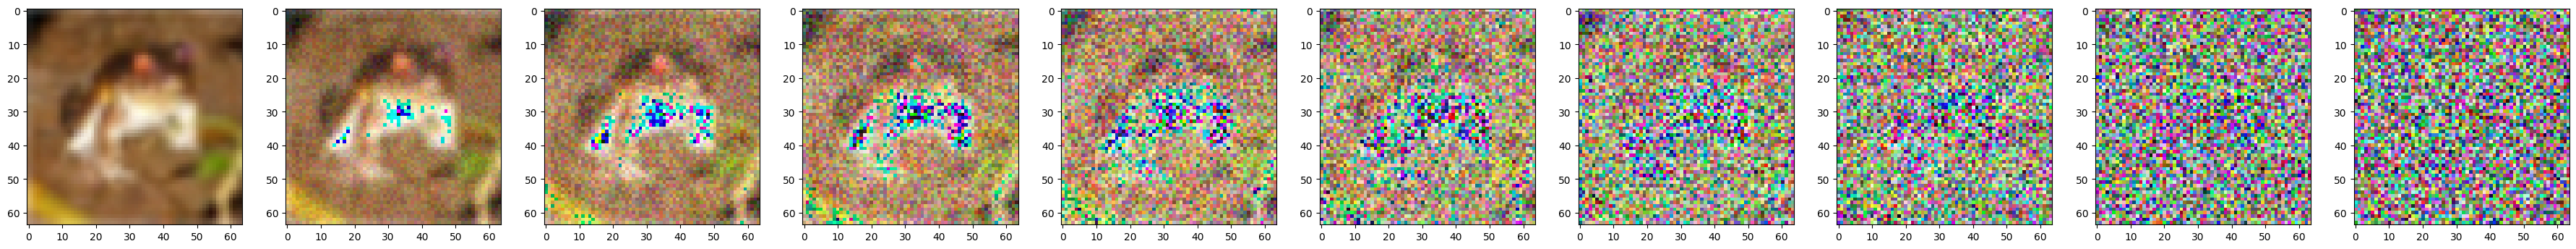

In [3]:
# Test forward diffusion on one-image example
image = next(iter(train_loader))[0]
plt.figure(figsize=(50,50))
plt.axis("off")
num_images =10
stepsize = int(CONFIG["total_timesteps"]/10)
for idx in range(0, CONFIG["total_timesteps"], stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images + 1, int(idx/stepsize) + 1)
    img, noise = diffusion_model.forward_diffusion(image, t)
    show_tensor_image(img)

In [4]:
# Initialise model & optimizer
model = diffusion_model.DDPM()
optimizer = Adam(model.parameters(), lr=0.01)
epoch = CONFIG["epoch"]
T = CONFIG["total_timesteps"]
batch_size = CONFIG["batch_size"]

In [5]:
for e in range(epoch): # Default training process (Non stochastic-interpolant)
    for i, img_ in enumerate(train_loader):
        img = img_[0]
        optimizer.zero_grad()
        t = torch.randint(0, T, (batch_size, )).type(torch.int64)
        loss = diffusion_model.get_loss(img, t, model)
        loss.backward()
        optimizer.step()

    if e % 5 == 0:
        print(f"Epoch {e} | Loss: {loss.item()} ")
        sample_generated_image()

RuntimeError: The size of tensor a (32) must match the size of tensor b (16) at non-singleton dimension 0